In [1]:
from sklearn.manifold import TSNE
import h5py

In [4]:
h5f = h5py.File('./Container/train', 'r')
features = h5f['features_one_hot'][:]
labels = h5f['labels_int_enc'][:]

In [5]:
n_components = 2

model = TSNE(n_components=n_components)
result = model.fit_transform(features)

C:\Users\kami.DESKTOP-5P4EH18\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\kami.DESKTOP-5P4EH18\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


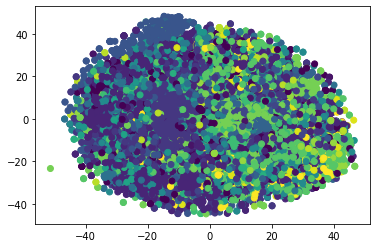

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(result[:,0], result[:,1],c=labels)
fig.savefig('./Data_analysis/tsne_one_hot_vector.png')